## Set Up

In [1]:
import os
import json
import datetime
import numpy as np
import pandas as pd

from plotnine import *
from tqdm.notebook import tqdm


# Gen AI Statement



In compliance with the DS105W 🤖 Generative AI Policy, I declare that I have used:
- Chat GPT 3.5 and logs have been uploaded as for GenAIl project
- I have github co-pilot installed which was mainly used to brainstorm functions and chunks or code to get started
- Chat GPT was mainly used to trouble find other designs for my table, such as what other colour, formatting and font options are there, among other uses

In [30]:
# Read the CSV file into a DataFrame
df = pd.read_csv('../data/peaky_blinders_synopsis.csv')


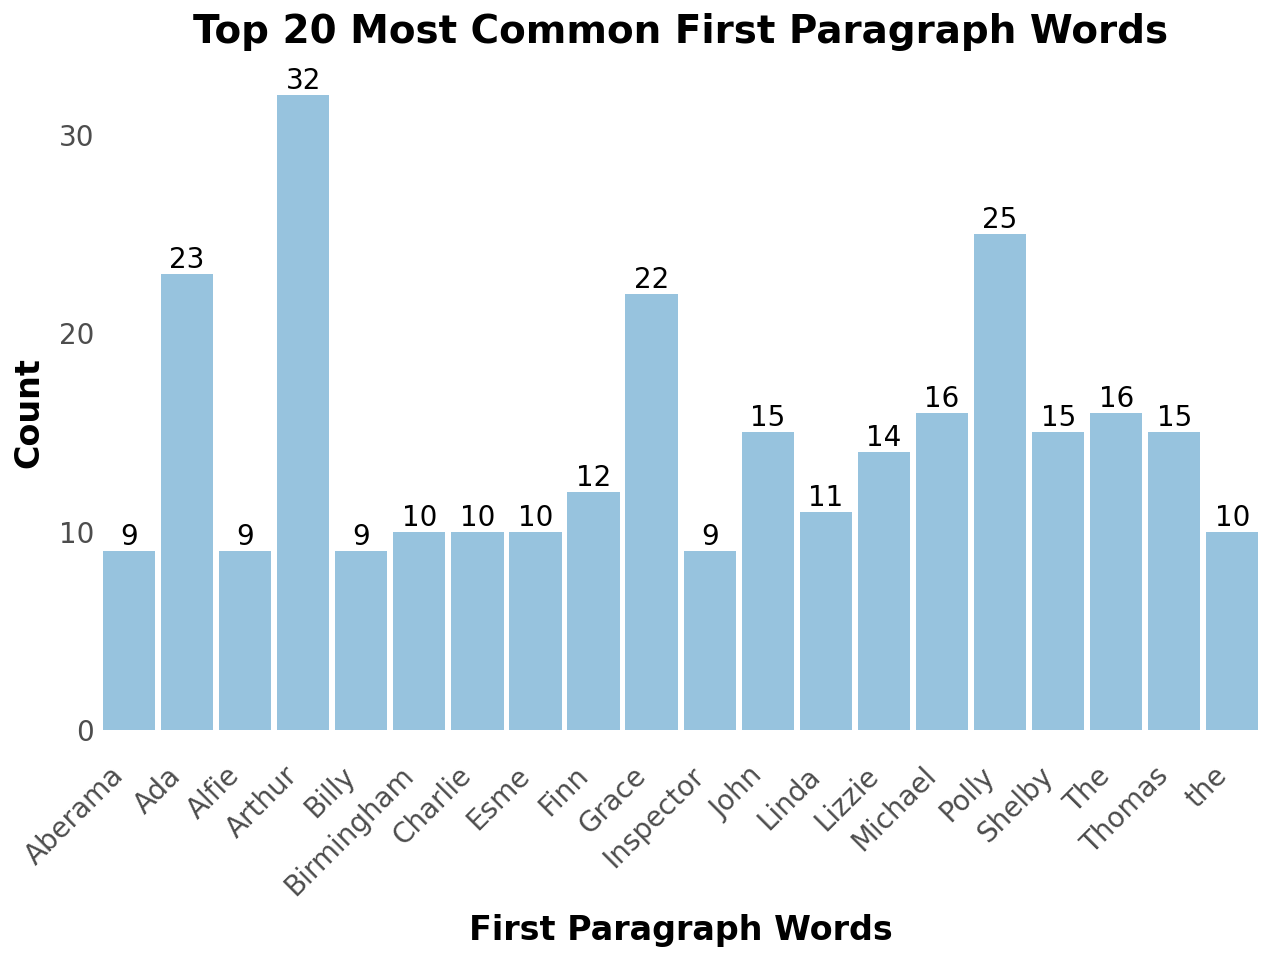

In [37]:
# Preprocess the data to extract the first paragraph words
first_paragraph_words = df['link_title'].str.split().str[0]

# Count the occurrences of each first paragraph word and select the top 20
top_paragraph_words = first_paragraph_words.value_counts().head(20).reset_index()
top_paragraph_words.columns = ['paragraph_word', 'count']

# Plot the bar chart with a professional design and lighter colors
(
    ggplot(top_paragraph_words, aes(x='paragraph_word', y='count', label='count')) +
    geom_bar(stat='identity', fill='#7EB5D6', alpha=0.8) +
    geom_text(size=10, va='bottom', color='black') +  
    theme_minimal() +
    theme(axis_text_x=element_text(angle=45, hjust=1, size=10),
          axis_text_y=element_text(size=10),
          axis_title=element_text(size=12, face='bold'),
          plot_title=element_text(size=14, face='bold'),
          panel_grid_major=element_blank(),
          panel_grid_minor=element_blank(),
          panel_border=element_blank(),
          panel_background=element_blank()) +
    labs(x='First Paragraph Words', y='Count', title='Top 20 Most Common First Paragraph Words')
)


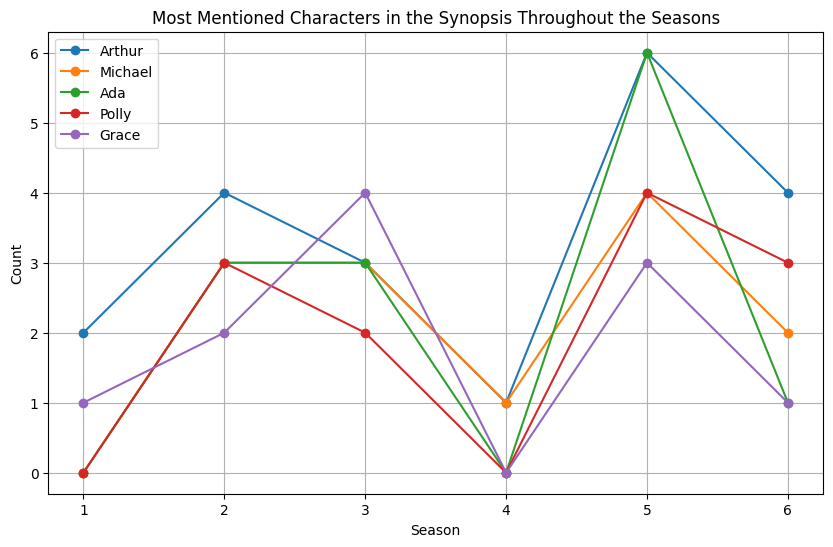

In [26]:
import matplotlib.pyplot as plt

# Preprocess the data
name_counts = df['link_title'].value_counts()

# Select the top 5 most popular names
top_names = name_counts.head(5).index.tolist()

name_counts_by_season = {name: [] for name in top_names} # Create a dictionary to store the counts by season

for season, season_data in df.groupby('season_num'):
    for name in top_names:
        name_counts_by_season[name].append(season_data[season_data['link_title'] == name].shape[0])

# Plot the results
plt.figure(figsize=(10, 6))
for name in top_names:
    plt.plot(range(1, len(name_counts_by_season[name]) + 1), name_counts_by_season[name], label=name, marker='o')

plt.xlabel('Season')
plt.ylabel('Count')
plt.title('Most Mentioned Characters in the Synopsis Throughout the Seasons')
plt.legend()
plt.grid(True)
plt.xticks(range(1, len(name_counts_by_season[top_names[0]]) + 1))
plt.show()
